# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,mean_absolute_error,accuracy_score,f1_score,balanced_accuracy_score,precision_score,recall_score

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
#Ojo con el mismo tamaño
#Es enconrtar el error entre reales y predicciones para dos divisiones de y distintas
print(f"Training set r2 = {r2_score(y_pred_train, y_train)}\nTesting set r2 = {r2_score(y_pred_test, y_test)}")

Training set r2 = 0.6203936636554419
Testing set r2 = 0.6984509487797342


## 4. Calculate and print mean squared error for both the training and the testing set.

In [25]:
# train error
mse_train = mean_squared_error(y_train, y_pred_train)
     
# test error
mse_test = mean_squared_error(y_test,y_pred_test)
print(f"Training MSE = {mse_train}\nTesting MSE = {mse_test}")

Training MSE = 22.3144676989015
Testing MSE = 20.74090327712318


**Los errores son ligeramente mayores para el test como es de esperar.**

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [29]:
mae_train = mean_absolute_error(y_train, y_pred_train)
     
# test error
mae_test = mean_absolute_error(y_test,y_pred_test)
print(f"Training MAE = {mae_train}\nTesting MAE = {mae_test}")

Training MAE = 3.242687487020712
Testing MAE = 3.20888591954958


## Classification Model Evaluation

In [32]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train.values.ravel())
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [42]:
a_test = accuracy_score(y_test, y_pred_test)
a_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy Score Train = {a_train}\nAccuracy Score Test  = {a_test}")

Accuracy Score Train = 0.9666666666666667
Accuracy Score Test  = 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [47]:
ba_test = balanced_accuracy_score(y_test, y_pred_test)
ba_train = balanced_accuracy_score(y_train, y_pred_train)

print(f"B_Accuracy_Train = {ba_train}\nB_Accuracy_Test  = {ba_test}")

B_Accuracy_Train = 0.9630124777183601
B_Accuracy_Test  = 0.9791666666666666


## 10. Calculate and print the precision score for both the training and the testing set.

In [68]:
'''
Si se pone None, devuelve la precisión para cada clase, si se pone weighted hace la media.
Como no especifica para qué usaremos, no sé cuál es más adecuada, dejo un ejemplo de cada uno.
'''
ps_test = precision_score(y_test, y_pred_test,average=None)
ps_train = precision_score(y_train, y_pred_train,average='weighted')

print(f"Precision_Train = {ps_train}\n\nPrecision_Test  = {ps_test}")

Precision_Train = 0.9672327898550724

Precision_Test  = [1.         0.85714286 1.        ]


## 11. Calculate and print the recall score for both the training and the testing set.

In [76]:
recall_score_test = recall_score(y_test, y_pred_test,average=None)
recall_score_train = recall_score(y_train, y_pred_train,average=None)

print(f"recall_score_train = {recall_score_train}\nrecall_score_test  = {recall_score_test}")

recall_score_train = [1.         0.97727273 0.91176471]
recall_score_test  = [1.     1.     0.9375]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [75]:
f1_score_test = f1_score(y_test, y_pred_test,average=None)
f1_score_train = f1_score(y_train, y_pred_train,average=None)

print(f"f1_score_train = {f1_score_train}\nf1_score_test  = {f1_score_test}")

f1_score_train = [1.         0.95555556 0.93939394]
f1_score_test  = [1.         0.92307692 0.96774194]


## 13. Generate confusion matrices for both the training and the testing set.

In [81]:
conf = confusion_matrix(y_test, y_pred_test)
conf = pd.DataFrame(conf)

conf

,0,1,2
0,8,0,0
1,0,6,0
2,0,1,15


In [80]:
conf = confusion_matrix(y_train, y_pred_train)
conf = pd.DataFrame(conf)
conf

,0,1,2
0,42,0,0
1,0,43,1
2,0,3,31


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Voy a usar el de iris, que lo tenemos menos repetido que el de boston.

In [90]:
data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8)

##### Caracteristicas de las flores

In [82]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Predecimos la clase, que en este caso es la especie de la flor. 
0 = setosa

1 = versicolor

2 = viriginica

In [89]:
y.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

## Pruebo el DecisionTree
Es un modelo discriminatorio.

In [98]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
pred=mod_dt.predict(X_test)
print(f"Accuracy = {accuracy_score(pred,y_test)}")

Accuracy = 0.9666666666666667


**Predice el casi 97% de los datos  bien**

In [99]:
mod_dt.feature_importances_

array([0.       , 0.       , 0.0518319, 0.9481681])

**Con muuucha diferencia, el feature más determinates es la anchura de los petalos.**

In [ ]:
from matplolib

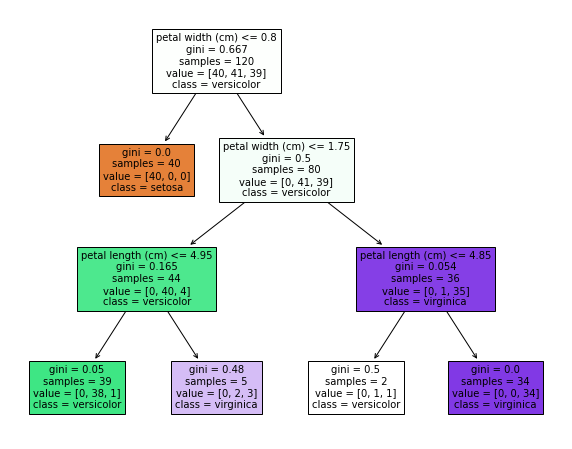

In [107]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = X.columns, class_names = ["setosa", "versicolor", "virginica"], filled = True);